In [1]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [3]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [4]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [6]:
# Create a set of random latitude and longitude combinations

lats = np.random.uniform(low = -90.000, high= 90.000, size =1500)
lngs = np.random.uniform(low = -180.000, high = 180.000, size = 1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [7]:
# add the latitudes and longitudes to a list

coordinates = list(lat_lngs)

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

616

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mahebourg
Processing Record 2 of Set 1 | fonte boa
Processing Record 3 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 4 of Set 1 | shostka
Processing Record 5 of Set 1 | maykain
City not found. Skipping...
Processing Record 6 of Set 1 | busselton
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | thompson
Processing Record 9 of Set 1 | khor
Processing Record 10 of Set 1 | victoria
Processing Record 11 of Set 1 | kuala terengganu
Processing Record 12 of Set 1 | ancud
Processing Record 13 of Set 1 | barrow
Processing Record 14 of Set 1 | avarua
Processing Record 15 of Set 1 | provideniya
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | puerto leguizamo
Processing Record 18 of Set 1 | rudbar
Processing Record 19 of Set 1 | saint-philippe
Processing Record 20 of Set 1 | nevers
Processing Record 21 of Set 1 | georgetown
Processing Reco

Processing Record 35 of Set 4 | pacific grove
Processing Record 36 of Set 4 | dalbandin
Processing Record 37 of Set 4 | anadyr
Processing Record 38 of Set 4 | tiksi
Processing Record 39 of Set 4 | tsumeb
Processing Record 40 of Set 4 | la ronge
Processing Record 41 of Set 4 | ambulu
Processing Record 42 of Set 4 | tessalit
Processing Record 43 of Set 4 | waitati
Processing Record 44 of Set 4 | port blair
Processing Record 45 of Set 4 | nishihara
Processing Record 46 of Set 4 | haimen
Processing Record 47 of Set 4 | quang ngai
Processing Record 48 of Set 4 | grand gaube
Processing Record 49 of Set 4 | guerrero negro
Processing Record 50 of Set 4 | tabiauea
City not found. Skipping...
Processing Record 1 of Set 5 | kruisfontein
Processing Record 2 of Set 5 | afua
Processing Record 3 of Set 5 | gimli
Processing Record 4 of Set 5 | sao gabriel da cachoeira
Processing Record 5 of Set 5 | baghdad
Processing Record 6 of Set 5 | khatanga
Processing Record 7 of Set 5 | san luis
Processing Recor

Processing Record 26 of Set 8 | chitungwiza
Processing Record 27 of Set 8 | baykit
Processing Record 28 of Set 8 | hasaki
Processing Record 29 of Set 8 | green valley
Processing Record 30 of Set 8 | rawson
Processing Record 31 of Set 8 | touros
Processing Record 32 of Set 8 | ponta do sol
Processing Record 33 of Set 8 | tambun
Processing Record 34 of Set 8 | san andres
Processing Record 35 of Set 8 | jambi
Processing Record 36 of Set 8 | huinan
Processing Record 37 of Set 8 | graham
Processing Record 38 of Set 8 | belaya gora
Processing Record 39 of Set 8 | barawe
City not found. Skipping...
Processing Record 40 of Set 8 | kpandae
Processing Record 41 of Set 8 | sao sebastiao do paraiso
Processing Record 42 of Set 8 | ketou
Processing Record 43 of Set 8 | maceio
Processing Record 44 of Set 8 | dauphin
Processing Record 45 of Set 8 | batticaloa
Processing Record 46 of Set 8 | toowoomba
Processing Record 47 of Set 8 | mogadishu
Processing Record 48 of Set 8 | vao
Processing Record 49 of 

Processing Record 17 of Set 12 | kudahuvadhoo
Processing Record 18 of Set 12 | doctor pedro p. pena
City not found. Skipping...
Processing Record 19 of Set 12 | kologriv
Processing Record 20 of Set 12 | port moresby
Processing Record 21 of Set 12 | grenaa
Processing Record 22 of Set 12 | saint-pierre
Processing Record 23 of Set 12 | thunder bay
Processing Record 24 of Set 12 | cervo
Processing Record 25 of Set 12 | sabang
Processing Record 26 of Set 12 | boshnyakovo
Processing Record 27 of Set 12 | hami
Processing Record 28 of Set 12 | usak
Processing Record 29 of Set 12 | dorogobuzh
Processing Record 30 of Set 12 | maningrida
Processing Record 31 of Set 12 | lemesos
City not found. Skipping...
Processing Record 32 of Set 12 | dashitou
Processing Record 33 of Set 12 | uttaradit
Processing Record 34 of Set 12 | viransehir
Processing Record 35 of Set 12 | hit
Processing Record 36 of Set 12 | avera
Processing Record 37 of Set 12 | hulan ergi
Processing Record 38 of Set 12 | thai nguyen
Pr

In [10]:
len(city_data)

564

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mahebourg,-20.4081,57.7000,79.25,83,75,11.50,MU,2022-04-03 21:42:03
1,Fonte Boa,-2.4959,-66.2662,76.98,93,83,0.65,BR,2022-04-03 21:44:26
2,Shostka,51.8630,33.4698,31.37,89,100,9.64,UA,2022-04-03 21:44:26
3,Busselton,-33.6500,115.3333,60.85,82,30,14.20,AU,2022-04-03 21:36:43
4,Rikitea,-23.1203,-134.9692,76.80,67,58,10.07,PF,2022-04-03 21:36:39
5,Thompson,55.7435,-97.8558,41.16,42,75,8.05,CA,2022-04-03 21:44:27
6,Khor,47.8861,134.9464,36.70,74,0,9.60,RU,2022-04-03 21:44:28
7,Victoria,22.2855,114.1577,64.33,63,0,8.99,HK,2022-04-03 21:38:24
8,Kuala Terengganu,5.3302,103.1408,76.95,100,100,5.01,MY,2022-04-03 21:44:28
9,Ancud,-41.8697,-73.8203,50.23,76,89,7.54,CL,2022-04-03 21:36:50


In [12]:
# rearrange df columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mahebourg,MU,2022-04-03 21:42:03,-20.4081,57.7000,79.25,83,75,11.50
1,Fonte Boa,BR,2022-04-03 21:44:26,-2.4959,-66.2662,76.98,93,83,0.65
2,Shostka,UA,2022-04-03 21:44:26,51.8630,33.4698,31.37,89,100,9.64
3,Busselton,AU,2022-04-03 21:36:43,-33.6500,115.3333,60.85,82,30,14.20
4,Rikitea,PF,2022-04-03 21:36:39,-23.1203,-134.9692,76.80,67,58,10.07
...,...,...,...,...,...,...,...,...,...
559,Balkanabat,TM,2022-04-03 22:00:22,39.5108,54.3671,73.29,18,0,2.24
560,Bongandanga,CD,2022-04-03 22:00:23,1.5000,21.0500,70.34,86,79,1.61
561,Abreus,CU,2022-04-03 22:00:24,22.2775,-80.5675,87.30,46,49,6.49
562,Bantou,CN,2022-04-03 22:00:24,26.2151,117.4893,48.52,82,0,2.91


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# 6.3.1 Plot Latitude vs Temperature! 

In [15]:
# Import time module
import time


In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

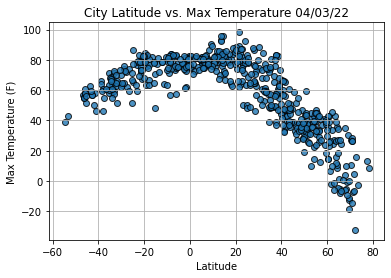

In [17]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

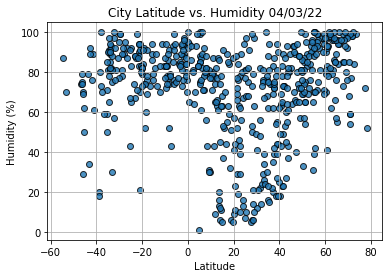

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

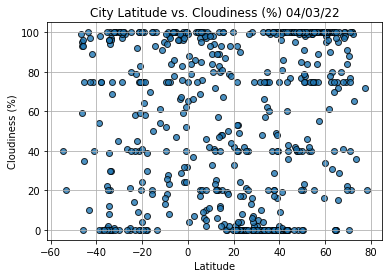

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.

plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

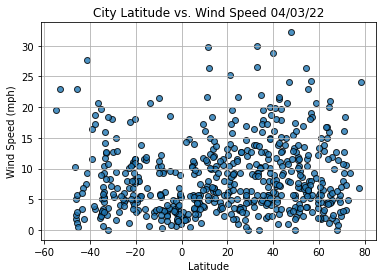

In [20]:
# Build the scatter plots for latitude vs. wind speed.

plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [21]:
# 6.4.2

# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [22]:
# create a new dataframe from existing datafream

index13 = city_data_df.loc[13]
index13

City                 Punta Arenas
Country                        CL
Date          2022-04-03 21:36:36
Lat                        -53.15
Lng                      -70.9167
Max Temp                    42.91
Humidity                       70
Cloudiness                     20
Wind Speed                  23.02
Name: 13, dtype: object

In [24]:
# return a datafram with all data fitting lattitude >0 (ie Norhtern Hemisphere)
city_data_df.loc[(city_data_df["Lat"] >= 0)].head(5)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Shostka,UA,2022-04-03 21:44:26,51.8630,33.4698,31.37,89,100,9.64
5,Thompson,CA,2022-04-03 21:44:27,55.7435,-97.8558,41.16,42,75,8.05
6,Khor,RU,2022-04-03 21:44:28,47.8861,134.9464,36.70,74,0,9.60
7,Victoria,HK,2022-04-03 21:38:24,22.2855,114.1577,64.33,63,0,8.99
8,Kuala Terengganu,MY,2022-04-03 21:44:28,5.3302,103.1408,76.95,100,100,5.01


In [25]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

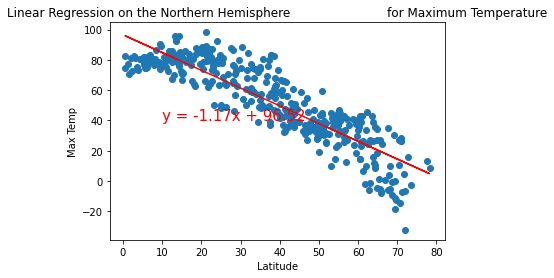

In [26]:
# Linear regression on the Northern Hemisphere - Max Temp
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

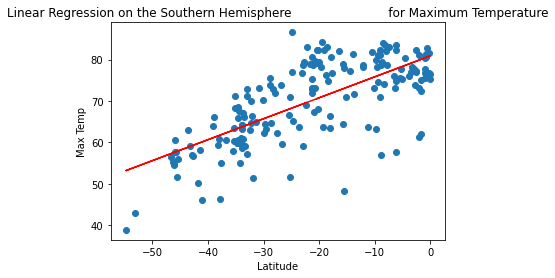

In [28]:
# Linear regression on the Southern Hemisphere - Max Temp
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

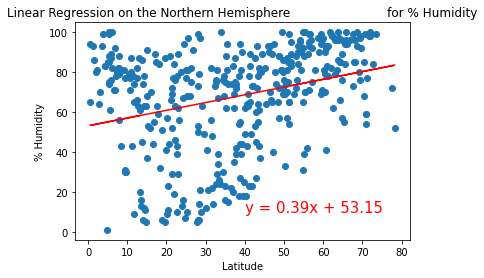

In [29]:
# Linear regression on the Northern Hemisphere - Humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

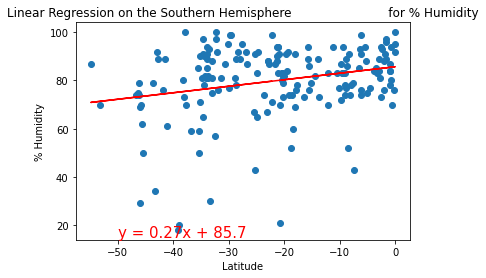

In [31]:
# Linear regression on the Southern Hemisphere - Humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

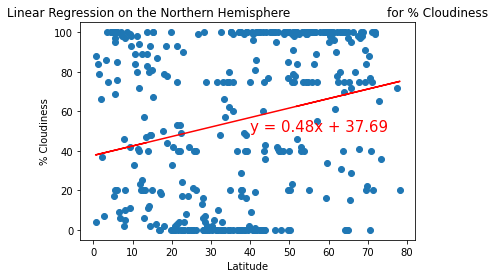

In [34]:
# Linear regression on the Northern Hemisphere - Cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,50))

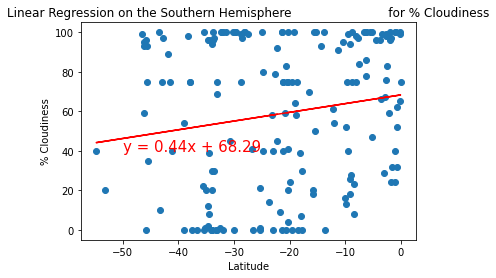

In [41]:
# Linear regression on the Southern Hemisphere - Cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,40))

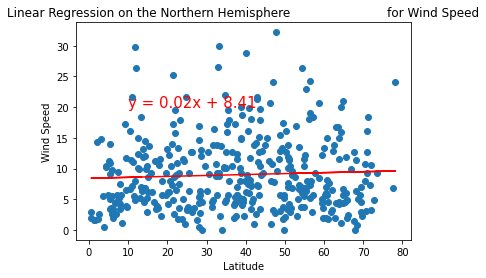

In [47]:
# Linear regression on the Northern Hemisphere - Wind Speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(10,20))

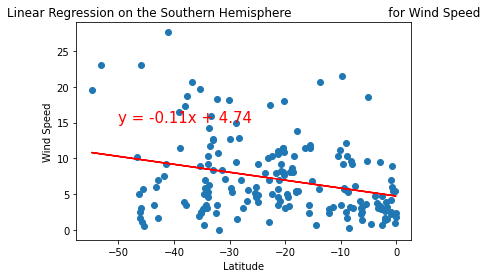

In [48]:
# Linear regression on the Southern Hemisphere - Windspeed
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,15))